Here is the graph with 14 Terminals (in red) and 60 Steiner nodes (in blue) we sampled


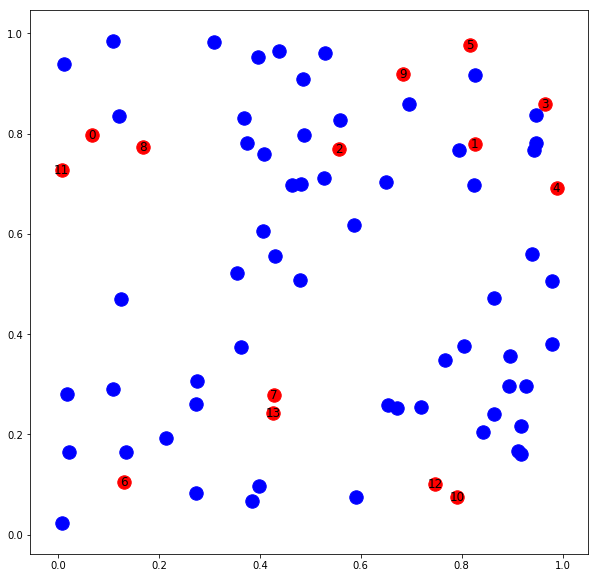



This is the initial solution - i.e. the spanning tree on the terminals - and it has weight 2.712698




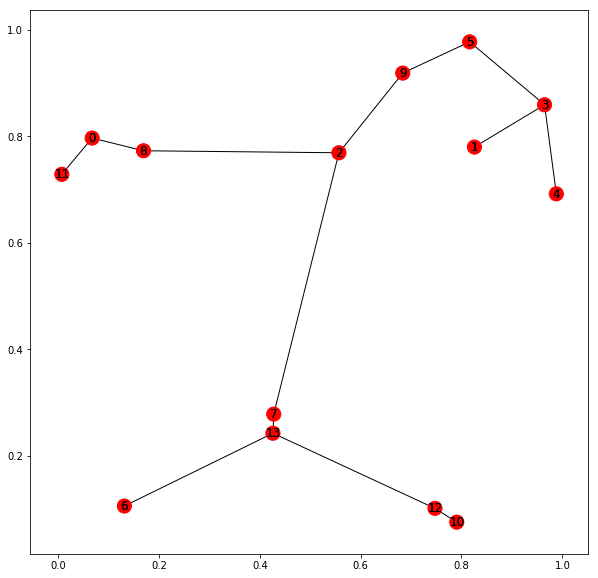



The current best solution has weight 2.712698, while the best candidate obtained at this iteration has cost 2.657924


We have found a better solution! The algorithm goes on
Here is the current best solution




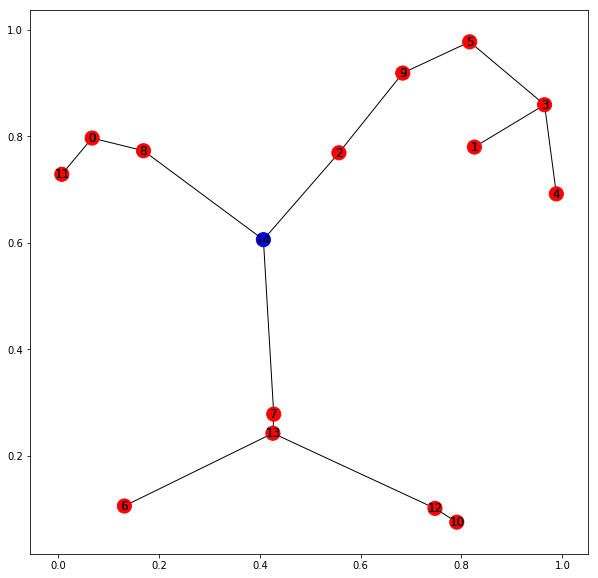



The current best solution has weight 2.657924, while the best candidate obtained at this iteration has cost 2.628501


We have found a better solution! The algorithm goes on
Here is the current best solution




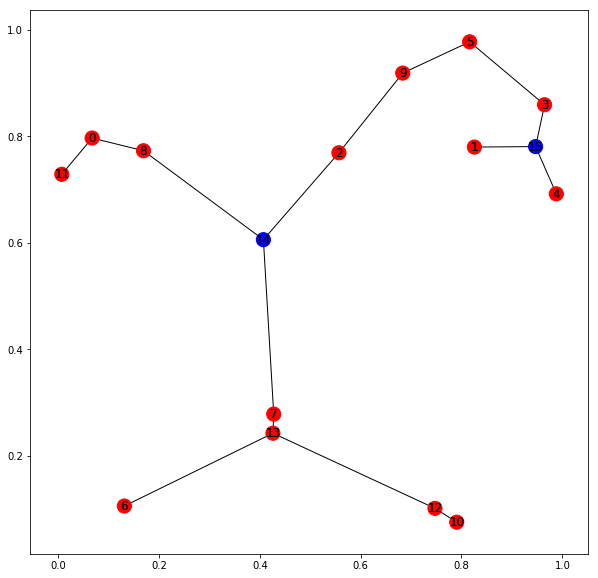



The current best solution has weight 2.628501, while the best candidate obtained at this iteration has cost 2.621392


We have found a better solution! The algorithm goes on
Here is the current best solution




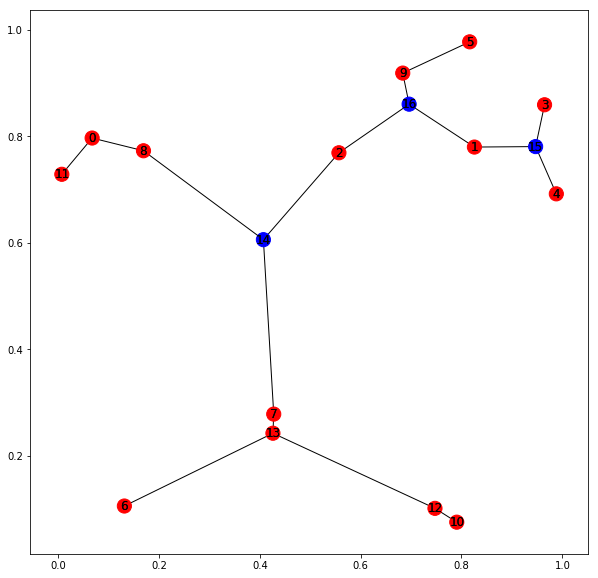



The current best solution has weight 2.621392, while the best candidate obtained at this iteration has cost 2.622027


We could not improve our solution. This is the best tree found, and it has weight 2.621392



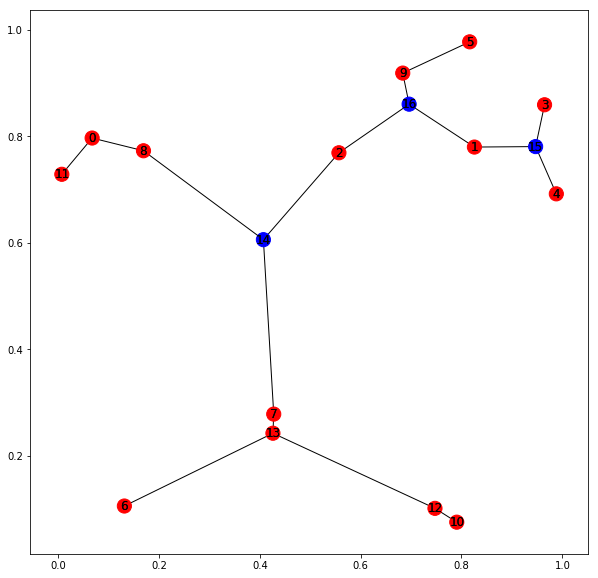

In [2]:
# This file contains the python code for:
# A random generator of a Steiner tree instance
# The 1-steiner algorithm
# Author: Yuri Faenza, Columbia University - yf2414@columbia.edu

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import time
import sys

# Parameters of figures

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

# function that computes the Euclidean distance between two points in R^2

def compute_distance (x1,y1,x2,y2):
    return ((x1-x2)**2+(y1-y2)**2)**(.5)

# function that computes the manhattan distance between two points in R^2

def compute_manhattan_distance (x1,y1,x2,y2):
    return (abs(x1-x2)+abs(y1-y2))

# function that creates a random Steiner tree instance over a complete graph with euclidean distances. It can be adapted to other distance functions
# Input: k = number of terminals; s = number of Steiner nodes; should_print=0/1 (1 to plot a picture of the instance, 0 otherwise)
# Output: G_terminal = graph in NetworkX format containing Terminal nodes, pos_terminal= coordinates of the terminals, pos_steiner = coordinates of the steiner nodes
# Output (cont): 

def twod_steiner_instance(k,s,should_print):
    
    G_terminal=nx.Graph() # we create a first graph that will contain the terminals
    pos_terminal={} # here we store the position of the terminals

    # Generates nodes as random points in the unit square
    
    for i in range(0,k):
        x_coordinate=np.random.random_sample()
        y_coordinate=np.random.random_sample()
        G_terminal.add_node(i,x=x_coordinate,y=y_coordinate) # each node has attributes (given as dictionaries) that represents its coordinates
        pos_terminal[i]=(x_coordinate,y_coordinate)     # additional storing of coordinates for drawing

    lab_terminal=range(k) # assign labels from 0 to k to terminals
        
    G_Steiner=nx.Graph() # we create a second graph containing the Steiner nodes
    pos_Steiner={} # here we store the position of the terminals
    
    for i in range(0,s):
        x_coordinate=np.random.random_sample()
        y_coordinate=np.random.random_sample()
        G_Steiner.add_node(i,x=x_coordinate,y=y_coordinate) # each node has attributes given as dictionaries
        pos_Steiner[i]=(x_coordinate,y_coordinate)     # coordinates for drawing
        
# if should_print=1, we plot the graph

    if should_print == 1:
        print("Here is the graph with %d Terminals (in red) and %d Steiner nodes (in blue) we sampled" % (k,s))
         
        nx.draw_networkx_nodes(G_terminal,pos_terminal,node_color='r',node_size=180) # prints nodes of the graph G_terminal, i.e. terminals
        nx.draw_networkx_labels(G_terminal,pos_terminal,font_size=12,label=lab_terminal) # prints labels

        nx.draw_networkx_nodes(G_Steiner,pos_Steiner,node_color='b',node_size=180)  # prints Steiner nodes        
        plt.show()
    
# assigning euclidean distances as weights of edges in G_terminal

    for i in range(0,k):
        for j in range(i+1,k):
            G_terminal.add_edge(i,j, weight=compute_distance(G_terminal.node[i]['x'],G_terminal.node[i]['y'],G_terminal.node[j]['x'],G_terminal.node[j]['y'])) # add the attribute weight to each edge, given by the euclidean distance
  
    return (G_terminal,pos_terminal,pos_Steiner)

## function that adds one (Steiner) node to the graph
## Input: G= current graph; pos=position of nodes of G, x_coordinate= x-coordinate of the node to add; y_coordinate: y-coordinate of the node to add; lab = label of the node to add
## Output: G = new graph; pos= new vector of positions    
    
def enlarge_graph (G,pos,x_coordinate,y_coordinate):
    
    n=nx.number_of_nodes(G)
    G1=G.copy()
    G1.add_node(n,x=x_coordinate,y=y_coordinate)
    pos[n]=(x_coordinate,y_coordinate)
    
# we add edges between all nodes and the new node
    
    for i in range(0,n):
            G1.add_edge(i,n, weight=compute_distance(G1.node[i]['x'],G1.node[i]['y'],G1.node[n]['x'],G1.node[n]['y'])) # add the attribute weight to each edge, given by the euclidean distance
            
    return (G1,pos)

## Main

## Setting up the parameters

k = 14 # number of Terminals
s = 60 # number of Steiner nodes

# Creating the graph

(G_terminal,pos,pos_Steiner)=twod_steiner_instance(k,s,1)

# Step 1 of the algorithm: the original solution is the MST over G[R]

T=nx.minimum_spanning_tree(G_terminal,'weight') # current best is the Spanning tree given by terminal nodes
color = ['r'] * k

# Recording the data of current best solution

best_weight=nx.Graph.size(T,'weight') # weight of the best graph found so far
G_best=G_terminal  # best collection of nodes found so far

# Drawing the initial solution 

print("")
print("")
print("This is the initial solution - i.e. the spanning tree on the terminals - and it has weight %f" % best_weight)
print("")
print("")

nx.draw_networkx_labels(T,pos,node_size=100)
nx.draw_networkx(T,pos,node_size=200,node_color=color)
plt.show()

found_better=1 # set to 1 if we improved wrt the previous best solution, 0 otherwise
added_Steiner=[] # list of Steiner nodes that have been added to the current solution

while found_better == 1: # while we improve the solution at the current iteration
    
    temp_weight=2*(s+k) # cost of the best "new solution" found so far - at the beginning is a very big number 
    color.append('b') # all new nodes are Steiner, so we give them color blue
    steiner_to_add=-1 # which is the Steiner node that decreases the weight the most - at the beginning no-one
    
    for i in range(s):
        if not (i in added_Steiner): # if node i has not been added yet to the list of Steiner nodes
            
            # Computes the MST of the graph with the new node added          
            
            (G,pos1)=enlarge_graph(G_best,pos,pos_Steiner[i][0],pos_Steiner[i][1])
            T1=nx.minimum_spanning_tree(G,'weight')
            candidate_weight=nx.Graph.size(T1,'weight')

# Uncomment this if you want all spanning trees that are evaluated to be printed
#
#            print("Here is a tree with cost %f" % candidate_weight)
#            nx.draw_networkx_labels(T1,pos,node_size=100)
#            nx.draw_networkx(T1,pos,node_size=200,node_color=color)
#            plt.show()
            
            # Compares the weight of the current candidate solution  with the weight of the best candidate solution obtained in this iteration of the "while", and records the best
            
            if candidate_weight < temp_weight:
                temp_weight=candidate_weight
                steiner_to_add=i
                        
# Once that all Steiner nodes have been added, it compares the best candidate solution with the best solution obtained so far
# If it is better, it updates the solution and continues. Else, it stops
    
    print("")
    print("")
    print("The current best solution has weight %f, while the best candidate obtained at this iteration has cost %f" % (best_weight,temp_weight))
    print("")
    print("")

    if temp_weight < best_weight:
        
        print("We have found a better solution! The algorithm goes on")
        print("Here is the current best solution")
        print("")
        print("")
        
        # if we found a better solution, we update the graph G_best where the best current solution is found
        (G_best,pos)=enlarge_graph(G_best,pos,pos_Steiner[steiner_to_add][0],pos_Steiner[steiner_to_add][1])
        
        # and we print the best solution found so far
        
        T=nx.minimum_spanning_tree(G_best,'weight')
        nx.draw_networkx_labels(T,pos,node_size=100)
        nx.draw_networkx(T,pos,node_size=200,node_color=color)
        plt.show()
        
        best_weight=temp_weight # updates the weight of the best solution
        added_Steiner.append(steiner_to_add) # updates the list of Steiner nodes we used
    
    else:
        print("We could not improve our solution. This is the best tree found, and it has weight %f" % best_weight)
        print("")
        
        # if we could not improve our current solution, we print the best found so far, exit the "while" cycle and stop
        
        T_final=nx.minimum_spanning_tree(G_best,'weight') # current best is the Spanning tree given by terminal nodes
        nx.draw_networkx_labels(T_final,pos,node_size=100)
        nx.draw_networkx(T_final,pos,node_size=200,node_color=color)
        plt.show()
        
        found_better=0
        


    

